<a href="https://colab.research.google.com/github/JairEsc/Mat_Apl_2/blob/main/Epidemiologia/Epid_3_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Cargamos los datos. En este caso, es tardado subir el archivo porque es muy pesado. Consideramos sólo las columnas correspondientes a fechas de ingreso, inicio de sintomas y defunción.

In [47]:
B1=pd.read_csv('201006COVID19MEXICO.csv',usecols=['FECHA_INGRESO','FECHA_SINTOMAS','FECHA_DEF'], encoding='latin-1')

In [48]:
print(B1)#

        FECHA_INGRESO FECHA_SINTOMAS   FECHA_DEF
0          2020-03-31     2020-03-28  9999-99-99
1          2020-04-01     2020-03-28  9999-99-99
2          2020-03-14     2020-03-11  9999-99-99
3          2020-03-18     2020-03-17  9999-99-99
4          2020-02-27     2020-02-22  9999-99-99
...               ...            ...         ...
2021250    2020-10-04     2020-09-30  9999-99-99
2021251    2020-10-05     2020-10-01  9999-99-99
2021252    2020-10-05     2020-10-03  9999-99-99
2021253    2020-10-05     2020-10-01  9999-99-99
2021254    2020-10-05     2020-10-03  9999-99-99

[2021255 rows x 3 columns]


Notemos las dimensiones: 2,021,255 filas. (Número de registros.)

In [206]:
dia0=np.min(B1['FECHA_SINTOMAS'])
dia_f=np.max(B1['FECHA_SINTOMAS'])
print("Inicio de registro: ",dia0)
print("Final de registro: ",dia_f)
print("Numero de dias registrados: ",(pd.to_datetime(dia_f)-pd.to_datetime(dia0)).days)

Inicio de registro:  2020-01-01
Final de registro:  2020-10-06
Numero de dias registrados:  279


In [50]:
#Semanas
Num_semanas=int((pd.to_datetime(dia_f)-pd.to_datetime(dia0)).days/7)+1
vec_semanas=[str(pd.to_datetime(dia0) + pd.to_timedelta(7*i, unit='d'))[0:10] for i in range(0,Num_semanas+1)]

Mostramos un vector con los dias finales de cada semana considerada.

In [51]:
print(vec_semanas)

['2020-01-01', '2020-01-08', '2020-01-15', '2020-01-22', '2020-01-29', '2020-02-05', '2020-02-12', '2020-02-19', '2020-02-26', '2020-03-04', '2020-03-11', '2020-03-18', '2020-03-25', '2020-04-01', '2020-04-08', '2020-04-15', '2020-04-22', '2020-04-29', '2020-05-06', '2020-05-13', '2020-05-20', '2020-05-27', '2020-06-03', '2020-06-10', '2020-06-17', '2020-06-24', '2020-07-01', '2020-07-08', '2020-07-15', '2020-07-22', '2020-07-29', '2020-08-05', '2020-08-12', '2020-08-19', '2020-08-26', '2020-09-02', '2020-09-09', '2020-09-16', '2020-09-23', '2020-09-30', '2020-10-07']


Ahora, calcularemos la frecuencia por semana de los registros de inicio de sintomas.

In [52]:
ocurrencias=np.zeros(Num_semanas)
for fecha in B1['FECHA_SINTOMAS']:
    for k in range(1,len(ocurrencias)+1):#Esto se puede optimizar.
        if(fecha<vec_semanas[k] and fecha>=vec_semanas[k-1]):
            ocurrencias[k-1]+=1 
            break;

In [53]:
print(np.sum(ocurrencias))#Sí es particion.

2021255.0


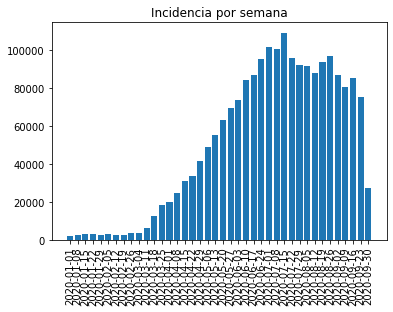

In [207]:
plt.bar(vec_semanas[0:-1],ocurrencias)
plt.xticks(rotation=90)
plt.title('Incidencia por semana')
plt.show()

In [353]:
def ode_SEIR(INP,t,beta,gamma,kappa):  #M2 Adimensional. 
    Y = np.zeros((4))
    V = INP    
    Y[0] = - beta * V[0] * V[2]/N 
    Y[1] = beta * V[0] * V[2]/N - kappa * V[1] 
    Y[2] = kappa*V[1] - gamma * V[2] 
    Y[3] = gamma * V[2] 
    return Y  

In [354]:
def rungekutta1(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        y[i+1] = y[i] + (t[i+1] - t[i]) * f(y[i], t[i], *args)
    return y

In [355]:
# Especificamos parámetros y condiciones iniciales
S0 = 120e6
I0 = 1
E0 = 1
INPUT = (S0,E0, I0, 0.0)
beta = 2
gamma = 0.25
kappa = 0.36
t_start = 0.0; 
t_end = 287; 
t_inc = 1.0
t_range = np.arange(t_start, t_end+t_inc, t_inc)
sol = rungekutta1(ode_SEIR, INPUT,t_range,args=(beta,gamma,kappa))

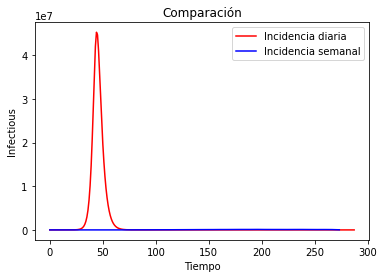

In [357]:
plt.figure()
plt.title('Comparación')
plt.plot(sol[:,2], '-r', label='Incidencia diaria')
plt.plot(np.arange(0,40*7,7),ocurrencias, '-b', label='Incidencia semanal')
plt.legend(loc=0)
plt.xlabel('Tiempo')
plt.ylabel('Infectious')
plt.show()

# **Intento de ajuste SIR.**

In [244]:
#!pip install lmfit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 292 kB 8.2 MB/s 
     |████████████████████████████████| 98 kB 7.2 MB/s 
  Created wheel for lmfit: filename=lmfit-1.0.3-py3-none-any.whl size=84413 sha256=fc5d57095909683a740a477e6510eade28a6c9784481dfa444208efd193e9c97
  Stored in directory: /root/.cache/pip/wheels/b9/7a/d1/236aa0f8196b264fda481a112f7cfb1bfde7bfb20235f8e331
Successfully built lmfit


In [256]:
from lmfit import minimize, Parameters, Parameter, report_fit
from scipy.integrate import odeint
import scipy.integrate as spi

In [360]:
def ode_SIR(INP,t,ps): #Codigo hurtado del dropbox.
    try:
        beta = ps['beta'].value
        gamma = ps['gamma'].value
        N = ps['N'].value
    except:
        beta,gamma,N = ps   
    Y = np.zeros((3))
    V = INP    
    Y[0] = - beta * V[0] * V[1] /N
    Y[1] = beta * V[0] * V[1]/N - gamma * V[1] 
    Y[2] = gamma * V[1] 
    return Y

In [361]:
def g(t,INP,ps):
    SOL = spi.odeint(ode_SIR,INPUT,t_range,args=(ps,))
    return SOL[:,1]

In [362]:
def residual(ps,ts,data):
    INP =  ps['I0'].value#Solo los infectados.
    model = g(ts,INP,ps)
    return (model-data).ravel()

In [363]:
N = 120e6
S0 = N-1
I0 = 1
INPUT = (S0, I0, 0.0)
t_start = 0.0; t_end = 39; t_inc = 1.0
t_range = np.arange(t_start, t_end+t_inc, t_inc)


Se trata de ajustar el nùmero de infectados a los datos observados.

In [365]:
data = ocurrencias

In [340]:
# set parameters incluing bounds
params = Parameters()
params.add('beta', value=2.0, min=0, max=10)
params.add('gamma', value=1.0, min=0, max=10)
params.add('N', value=float(N), min=N, max=N+1)
params.add('S0', value= float(120e6), min=0, max=120e6)
params.add('I0', value=float(1), min=0, max=1000)

In [366]:
# fit model and find predicted values
t = np.linspace(0, 10, 100)
result = minimize(residual, params, args=(t, data), method='leastsq')

final = data + result.residual.reshape(data.shape)
result


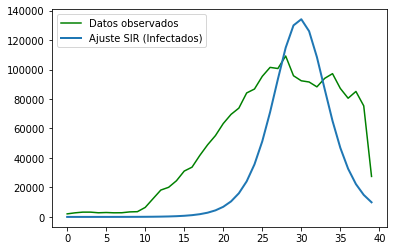

In [367]:
# plot data and fitted curves
plt.plot(data, '-g',label='Datos observados')
plt.plot(final, '-', linewidth=2,label='Ajuste SIR (Infectados)');
plt.legend()
plt.show()